In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

In [13]:
url = 'corona_data.csv'
data = pd.read_csv(url)
data.tail(2)

,City_Name,City_Code,Date,verified_cases,recovered,deaths,number_of_tests,number_of_diagnostic_tests,colour,final_score,month,year
157358,תקוע,3563,20/09/2021,6,9,0,67,67,orange,7.3,9,2021
157359,תקוע,3563,21/09/2021,0,4,0,47,47,orange,7.0,9,2021


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157360 entries, 0 to 157359
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   City_Name                   157360 non-null  object 
 1   City_Code                   157360 non-null  int64  
 2   Date                        157360 non-null  object 
 3   verified_cases              157360 non-null  int64  
 4   recovered                   157360 non-null  int64  
 5   deaths                      157360 non-null  int64  
 6   number_of_tests             157360 non-null  int64  
 7   number_of_diagnostic_tests  157360 non-null  int64  
 8   colour                      157360 non-null  object 
 9   final_score                 157360 non-null  float64
 10  month                       157360 non-null  int64  
 11  year                        157360 non-null  int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 14.4+ MB


# Q1

#### בחרתי להציג את הנתונים עבור שנת 2021 בעיר שמספר הקוד שלה הוא 7000

In [16]:
new= data.loc[(data.City_Code==7000) & (data.year ==2021)]
new.iloc[:2,0:2]


,City_Name,City_Code
80936,לוד,7000
80937,לוד,7000


In [17]:
new

,City_Name,City_Code,Date,verified_cases,recovered,deaths,number_of_tests,number_of_diagnostic_tests,colour,final_score,month,year
80936,לוד,7000,01/01/2021,42,26,1,776,770,orange,6.9,1,2021
80937,לוד,7000,02/01/2021,47,16,1,473,469,orange,7.0,1,2021
80938,לוד,7000,03/01/2021,40,50,0,692,683,orange,7.0,1,2021
80939,לוד,7000,04/01/2021,47,17,0,732,727,orange,7.0,1,2021
80940,לוד,7000,05/01/2021,63,20,0,948,940,orange,7.0,1,2021
...,...,...,...,...,...,...,...,...,...,...,...,...
81195,לוד,7000,17/09/2021,26,67,0,607,594,red,7.8,9,2021
81196,לוד,7000,18/09/2021,88,26,0,942,932,red,7.8,9,2021
81197,לוד,7000,19/09/2021,58,193,1,954,926,red,7.8,9,2021
81198,לוד,7000,20/09/2021,164,123,0,1781,1755,red,7.8,9,2021


# Q2

#### בחרתי להציג לפי מספר חודש את מספר המאומתים ומספר המחלימים מקורונה

In [18]:
new.groupby('month')[['verified_cases','recovered']].max()

,verified_cases,recovered
month,,
1,134,146
2,122,174
3,110,79
4,11,22
5,5,5
6,3,5
7,25,15
8,142,147
9,164,193


# Q3

#### נחשב את הקורלציה בין מספר הבדיקות למספר המאומתים:

<AxesSubplot:>

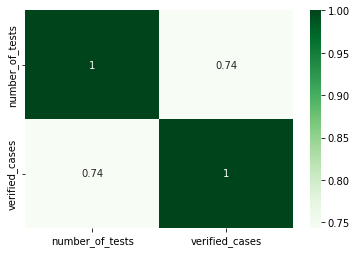

In [19]:
features = ['number_of_tests','verified_cases']
correlation_matrix = new[features].corr()
sns.heatmap(data=correlation_matrix,cmap='Greens', annot=True)

# ניתן לראות מהאיור שהקשר בין מספר הבדיקות לבין מספר המאומתים הוא 0.74, כלומר קשר גבוה וחיובי

Text(0.5, 1.0, 'The Corrolation between number of tests and verified cases')

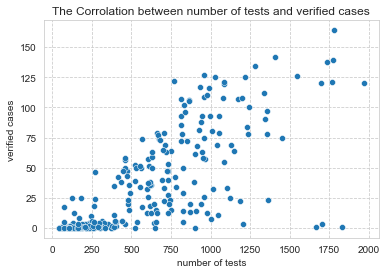

In [47]:
sns.scatterplot(x = "number_of_tests", y = "verified_cases", data = new)
plt.xlabel("number of tests")
plt.ylabel("verified cases")
plt.title("The Corrolation between number of tests and verified cases")

Text(0.5, 1.0, 'The Corrolation between number of tests and verified cases')

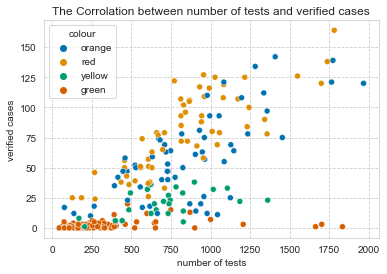

In [45]:
scat=sns.scatterplot(data=new, x="number_of_tests", y="verified_cases", hue = 'colour', palette = 'colorblind')
plt.xlabel("number of tests")
plt.ylabel("verified cases")
plt.title("The Corrolation between number of tests and verified cases")

# Q4

#### יצרתי טבלה המציגה לפי מספר חודש את כמות החולים בעיר מכל "צבע"

In [35]:
#new.groupby(['colour','month'])[['month']].count()

new.pivot_table('Date', index='colour', columns='month', aggfunc='count') 


month,1,2,3,4,5,6,7,8,9
colour,,,,,,,,,
green,NaN,NaN,13.0,30.0,31.0,30.0,16.0,NaN,NaN
orange,14.0,14.0,8.0,NaN,NaN,NaN,7.0,7.0,10.0
red,17.0,14.0,NaN,NaN,NaN,NaN,NaN,17.0,11.0
yellow,NaN,NaN,10.0,NaN,NaN,NaN,8.0,7.0,NaN


# Q5

#### הצגתי בשני גרפים את סכום החולים המאומתים בכל חודש ואת סכום המחלימים בכל חודש

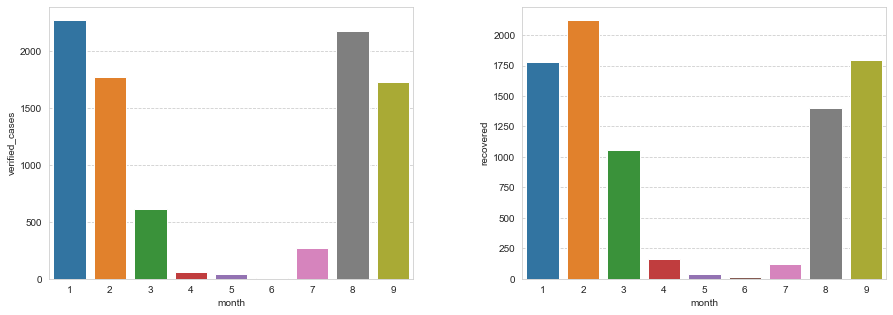

In [52]:
fig, axes = plt.subplots(figsize=(15, 5), ncols=2)
plt.subplots_adjust(wspace = 0.3)
sns.barplot(x="month", y="verified_cases", ci = None, estimator = sum, data=new,ax=axes[0] )
sns.barplot(x="month", y="recovered",   ci = None, estimator = sum, data=new, ax = axes[1])
plt.show()

# Q6

#### בניתי מודל חיזוי לצבע של העיר לפי מספר החולים, מספר המחלימים וקוד העיר

In [53]:
features = ['verified_cases', 'recovered', 'City_Code']
X= data[features] 
y= data['colour'] 
X_train, X_test, y_train, y_test= sk.model_selection.train_test_split(X,y, test_size=0.3, random_state=1)
model= sk.tree.DecisionTreeClassifier(random_state = 0)
model.fit(X_train, y_train)
pred= model.predict(X_test)
sk.metrics.accuracy_score(pred,y_test)

0.4853414675478732

In [61]:
model2 = sk.tree.DecisionTreeClassifier(criterion="gini")
model2.fit(X_train,y_train)
prediction2 = model2.predict(X_test)
sk.metrics.accuracy_score(prediction2, y_test)


0.48460006778512116

c:\users\einav\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


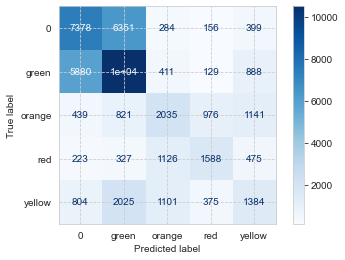

In [62]:
sk.metrics.plot_confusion_matrix(model2, X_test, y_test, cmap=plt.cm.Blues)
